# 모의고사 4회 문제 풀이(R 코드)
- rstudio에서 작성시 R 마크다운으로 작성필요
  - Rmd 확장자를 사용해야함
  - knit으로 pdf 생성하거나, html로 변환후 pdf 출력을 사용하면 됨
  - 이도저도 안되면 MS 워드에 복붙하는 방식으로 대응
- R 마크다운 포맷으로 작성할때 아래처럼 설명글과 코드를 작성하면 됨

<pre>
<code>
---
title: "타이틀"
output:
  html_document: default
---

# 타이틀
- 설명

```{r, warning = FALSE, message = FALSE}
sessionInfo()

# 분석 전 불필요한 객체 삭제 처리
rm(list = ls())

```
</code>
</pre>

In [23]:
###################################################################################
#                     2. 통계분석 (사용 데이터 : bike_marketing)               
###################################################################################
#---------------------------------------------------------------------------------
# Q1) pop_density 변수를 factor형 변수로 변환하고, 
#     pop_density별 revenues의 평균 차이가 있는지 통계분석을 시행하여 결과를 해석하시오. 
#     만일 대립가설이 채택된다면 사후분석을 실시하고 결과를 해석하시오.
#---------------------------------------------------------------------------------

# 3개 이상 범주에 대한 평균 차이 검정 => 일원 배치 분산분석(F 검정 통계량) - one way ANOVA => 귀무가설 기각시 사후검정 tukey HSD 수행

df = read.csv('./data/모의고사4회/bike_marketing.csv', stringsAsFactors = T)

head(df)

# 범주별 데이터 카운트
table(df$pop_density)

# 귀무가설 : pop_density별 revenues 차이가 없다.
# 대립가설 : pop_density별 revenues 차이가 있다.
anova <- aov(formula = revenues ~ pop_density, data = df)

# 유의수준 5% 하에서 p-value가 유의수준보다 크기 때문에 귀무가설을 기각할수 없다.
# 즉, pop_density별 revenues의 평균 차이가 있다고 볼 수 없다.
summary(anova)

# 만약 귀무가설이 기각된다면 tukey HSD(사후검정)을 수행한다.




,company_num,google_adwords,facebook,twitter,marketing_total,revenues,employees,pop_density
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
1,1,65.66,47.86,52.46,166,39.26,5,High
2,2,39.10,55.20,77.40,172,38.90,7,Medium
3,3,174.81,52.01,68.01,295,49.51,11,Medium
4,4,34.36,61.96,86.86,183,40.56,7,High
5,5,78.21,40.91,30.41,150,40.21,9,Low
6,6,34.19,15.09,12.79,62,38.09,3,High


[1] "D:/srkwon/0.repo/analysis/data-analysis-2021/1.ADP실기/문제풀이"


  High    Low Medium 
    52     68     52 

             Df Sum Sq Mean Sq F value Pr(>F)
pop_density   2     42   20.87    0.61  0.545
Residuals   169   5781   34.21               

In [25]:
#----------------------------------------------------------------------------------------
# Q2) google_adwords, facebook, twitter, marketing_total, employees가 
#     revenues에 영향을 미치는지 알아보는 회귀분석을 전진선택법을 사용하여 수행하고 결과를 해석하시오.
#----------------------------------------------------------------------------------------
# R을 이용하면 step 함수를 이용해서 쉽게 해결 가능하지만, python에서는 sklearn에 이러한 stepwise variable selection 관련 빌트인 함수가 없음
# 회귀분석은 R을 이용해서 수행하는 것이 나을 것으로 생각됨

#sessionInfo()

df <- read.csv(file = './data/모의고사4회/bike_marketing.csv')
head(df)

model <- lm(
    formula = revenues ~ google_adwords + facebook + twitter + marketing_total + employees
    , data = df
)

# 다중선형회귀를 했을때, summary로 확인해보면 됨
summary(model)

# 변수선택법은 전진선택법, 후진제거법, 단계적 선택법 총  3가지
# 각각 forward, backward, both 로 구분

# 전진선택법
# 변수를 하나씩 추가하면서 AIC값이 낮아질수록 더 좋은 성능의 모델(모형)
# 선택된 변수 google_adwords + facebook + twitter + marketing_total + employees
# 추정된 회귀식 revenues = 28.44 + 1.21 * google_adwords + 1.35 * facebook + 1.17 * twitter + -1.17 * marketing_total + 0.39 * employees
print("전진선택법==========================================")
step(model, direction = "forward")

print("후진제거법==========================================")
step(model, direction = "backward")

print("단계적선택법==========================================")
step(model, direction = "both")




,company_num,google_adwords,facebook,twitter,marketing_total,revenues,employees,pop_density
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,1,65.66,47.86,52.46,166,39.26,5,High
2,2,39.10,55.20,77.40,172,38.90,7,Medium
3,3,174.81,52.01,68.01,295,49.51,11,Medium
4,4,34.36,61.96,86.86,183,40.56,7,High
5,5,78.21,40.91,30.41,150,40.21,9,Low
6,6,34.19,15.09,12.79,62,38.09,3,High



Call:
lm(formula = revenues ~ google_adwords + facebook + twitter + 
    marketing_total + employees, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7788 -1.2437  0.2024  1.4643  4.2835 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      28.4433     0.5962  47.706  < 2e-16 ***
google_adwords    1.2110     0.5708   2.122 0.035348 *  
facebook          1.3464     0.5714   2.356 0.019618 *  
twitter           1.1724     0.5713   2.052 0.041711 *  
marketing_total  -1.1696     0.5708  -2.049 0.042033 *  
employees         0.3865     0.1042   3.708 0.000284 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.108 on 166 degrees of freedom
Multiple R-squared:  0.8733,	Adjusted R-squared:  0.8695 
F-statistic: 228.9 on 5 and 166 DF,  p-value: < 2.2e-16


[1] "전진선택법=========================================="
Start:  AIC=262.4
revenues ~ google_adwords + facebook + twitter + marketing_total + 
    employees




Call:
lm(formula = revenues ~ google_adwords + facebook + twitter + 
    marketing_total + employees, data = df)

Coefficients:
    (Intercept)   google_adwords         facebook          twitter  
        28.4433           1.2110           1.3464           1.1724  
marketing_total        employees  
        -1.1696           0.3865  


[1] "후진제거법=========================================="
Start:  AIC=262.4
revenues ~ google_adwords + facebook + twitter + marketing_total + 
    employees

                  Df Sum of Sq    RSS    AIC
<none>                         737.54 262.40
- marketing_total  1    18.654 756.19 264.70
- twitter          1    18.713 756.25 264.71
- google_adwords   1    20.000 757.54 265.00
- facebook         1    24.671 762.21 266.06
- employees        1    61.102 798.64 274.09



Call:
lm(formula = revenues ~ google_adwords + facebook + twitter + 
    marketing_total + employees, data = df)

Coefficients:
    (Intercept)   google_adwords         facebook          twitter  
        28.4433           1.2110           1.3464           1.1724  
marketing_total        employees  
        -1.1696           0.3865  


[1] "단계적선택법=========================================="
Start:  AIC=262.4
revenues ~ google_adwords + facebook + twitter + marketing_total + 
    employees

                  Df Sum of Sq    RSS    AIC
<none>                         737.54 262.40
- marketing_total  1    18.654 756.19 264.70
- twitter          1    18.713 756.25 264.71
- google_adwords   1    20.000 757.54 265.00
- facebook         1    24.671 762.21 266.06
- employees        1    61.102 798.64 274.09



Call:
lm(formula = revenues ~ google_adwords + facebook + twitter + 
    marketing_total + employees, data = df)

Coefficients:
    (Intercept)   google_adwords         facebook          twitter  
        28.4433           1.2110           1.3464           1.1724  
marketing_total        employees  
        -1.1696           0.3865  


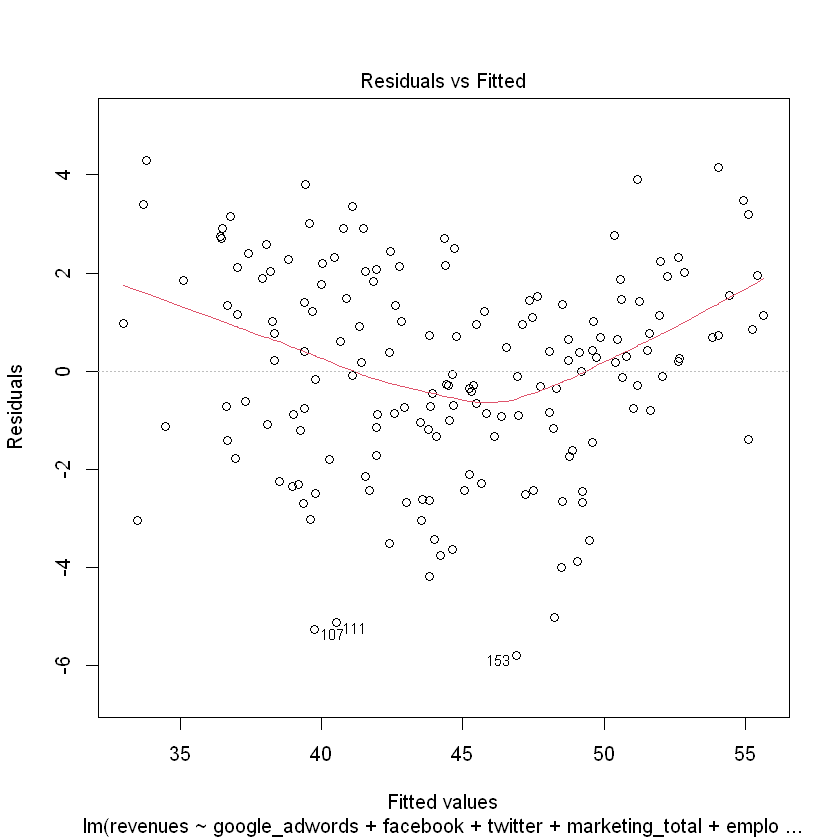

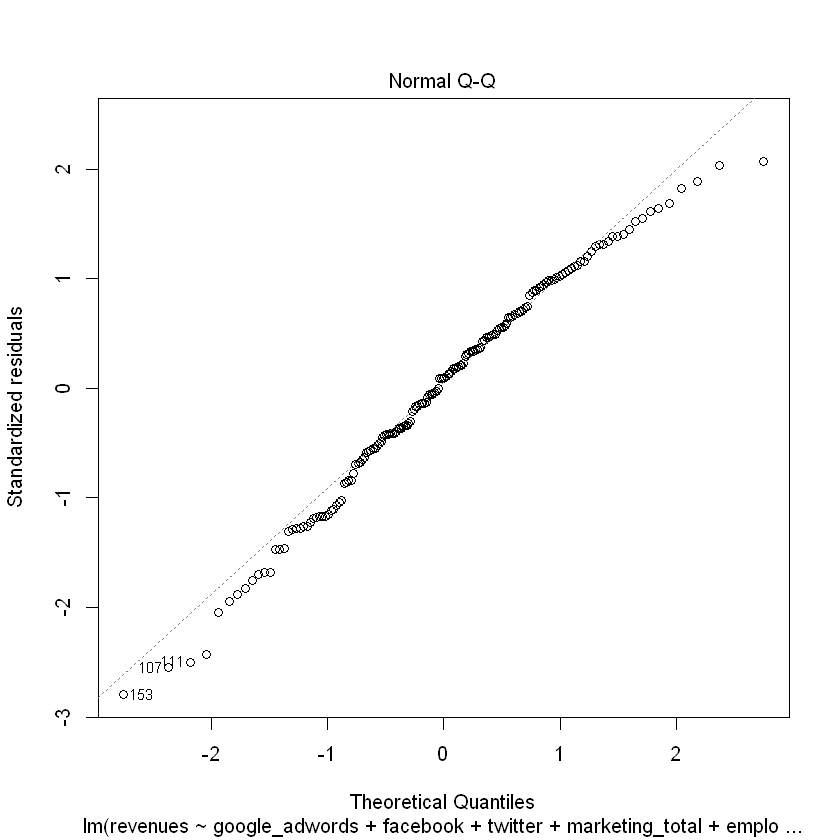

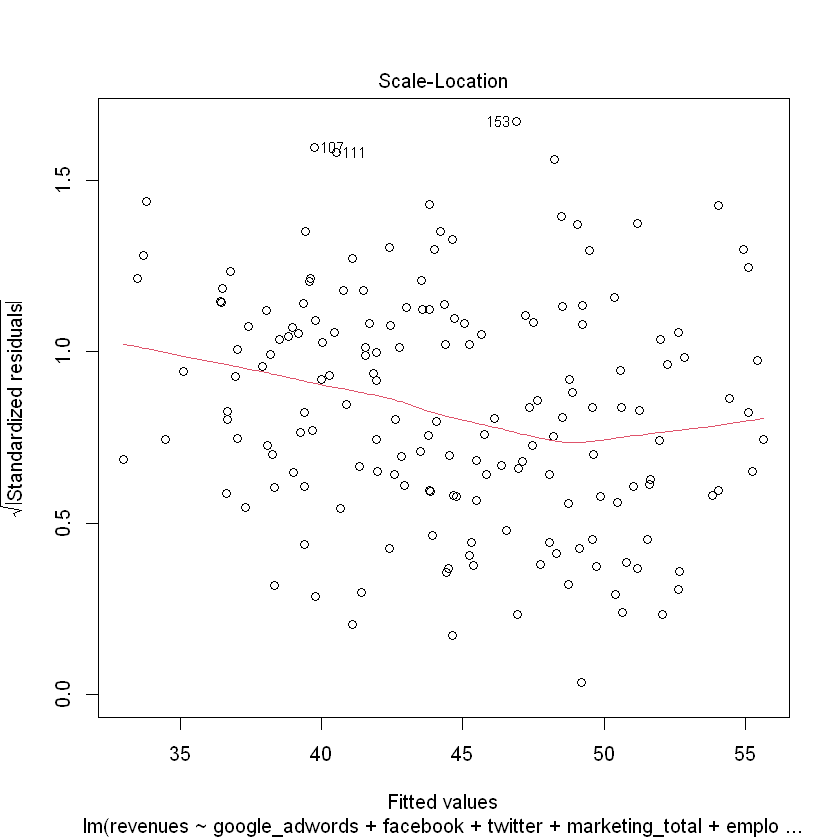

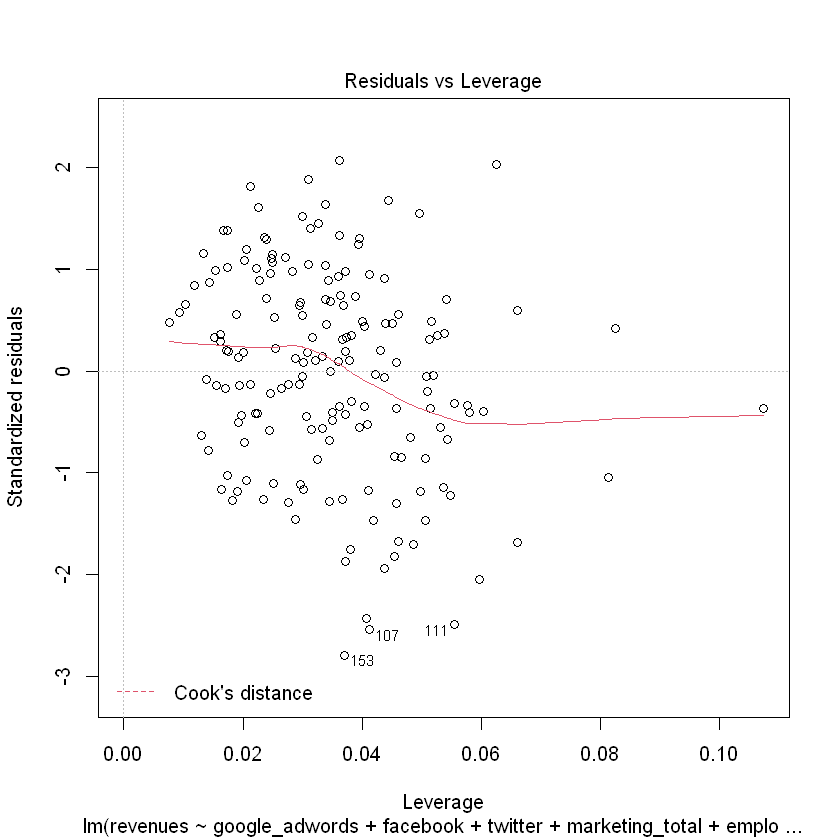

In [27]:
#---------------------------------------------------------------------------
# Q3) 전진선택법을 사용해 변수를 선택한 후 새롭게 생성한 회귀모형에 대한 
#     잔차분석을 수행하고 결과를 해석하시오. 
#---------------------------------------------------------------------------
# 잔차분석 => 회귀 모형에 대한 가정이 충족되는지 검정하는 것(잔차의 등분산성, 독립성, 정규성 확인)
# R plot 함수를 이용하여 잔차 분석 수행 가능
# 첫번째 => 잔차의 등분산성 확인 가능 관측값에 따른 잔차(관측 - 예측) 그래프 => 직선에 가까울수록 좋음
# 두번째 => QQ plot => 잔차의 정규성 확인 가능 => y=x에가까울수록 정규분포를 따름
# 세번째 => 첫번째 그래프와 동일한 의미
# 네번째 => 설명변수가 극단값에 있을수록 레버리지(x축)은 큰 값을 갖게 됨
plot(model)


# R 기반 텍스트 마이닝(KoNLP)
- `install.packages("KoNLP")" 로 설치가 바로 안되므로, 아래 순서대로 수동 설치 필요
  - https://www.youtube.com/watch?v=upukwMgPY28&ab_channel=%EC%86%A1%EC%8A%B9%EB%AF%BC%EC%9D%98%ED%8A%B9%EC%88%98%EA%B5%90%EC%9C%A1 영상 참고
```
1. R 설치하기(가급적 관리자 권한으로 설치)
https://ftp.harukasan.org/CRAN/

2. R Studio 설치하기(가급적 관리자 권한으로 설치)
https://rstudio.com/products/rstudio/...

3. rtools40 설치하기(c:/Rtools에 설치)
https://cran.r-project.org/bin/window...

4. java, rJava 설치하기
install.packages("multilinguer")
library(multilinguer)
install_jdk()

5. 의존성 패키지 설치하기
install.packages(c("hash", "tau", "Sejong", "RSQLite", "devtools", "bit", "rex", "lazyeval", "htmlwidgets", "crosstalk", "promises", "later", "sessioninfo", "xopen", "bit64", "blob", "DBI", "memoise", "plogr", "covr", "DT", "rcmdcheck", "rversions"), type = "binary")

6. github 버전 설치하기
install.packages("remotes")

7. KoNLP 설치하기(64bit에서만 동작)
remotes::install_github('haven-jeon/KoNLP', upgrade = "never", INSTALL_opts=c("--no-multiarch"))

8. 단어 사전 추가하기 
mergeUserDic(data.frame(c("강남대"), c("ncn")))
```

In [11]:
###################################################################################
#                      3. 비정형 데이터마이닝 (사용 데이터 : "instagram_태교여행")
###################################################################################

#---------------------------------------------------------------------------
# Q1) ‘instagram_태교여행.txt’ 데이터를 읽어온 뒤 숫자, 특수 문자 등을 
#     제거하는 전처리 작업을 시행하시오.
#---------------------------------------------------------------------------

library(tm)
library(rJava)
library(KoNLP)
library(wordcloud)
library(plyr)
library(stringr)

useSejongDic()

instagram_tour <- readLines("./data/모의고사4회/instagram_태교여행.txt")

# print(instagram_tour)

#데이터 전처리
clean_txt <- function(txt){
  txt <- tolower(txt)             # 대, 소문자 변환
  txt <- removePunctuation(txt)   # 구두점 제거
  txt <- removeNumbers(txt)       # 숫자 제거
  txt <- stripWhitespace(txt)     # 공백제거
  
  return(txt)
}

tour_1 <- clean_txt(instagram_tour)

# print(tour_1)

Backup was just finished!
370957 words dictionary was built.


629898 words dictionary was built.


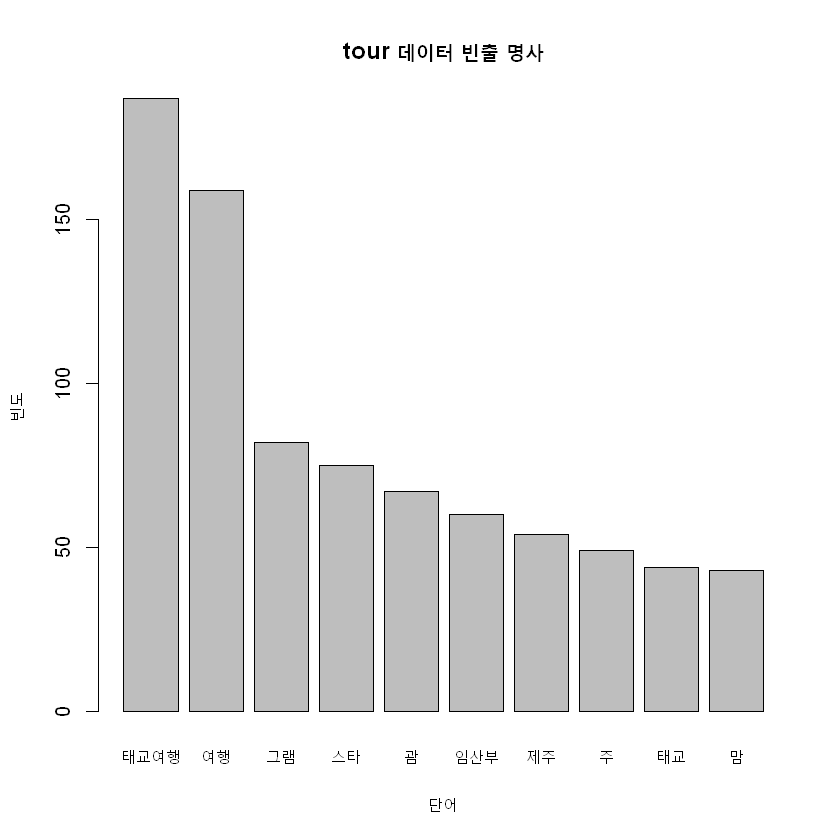

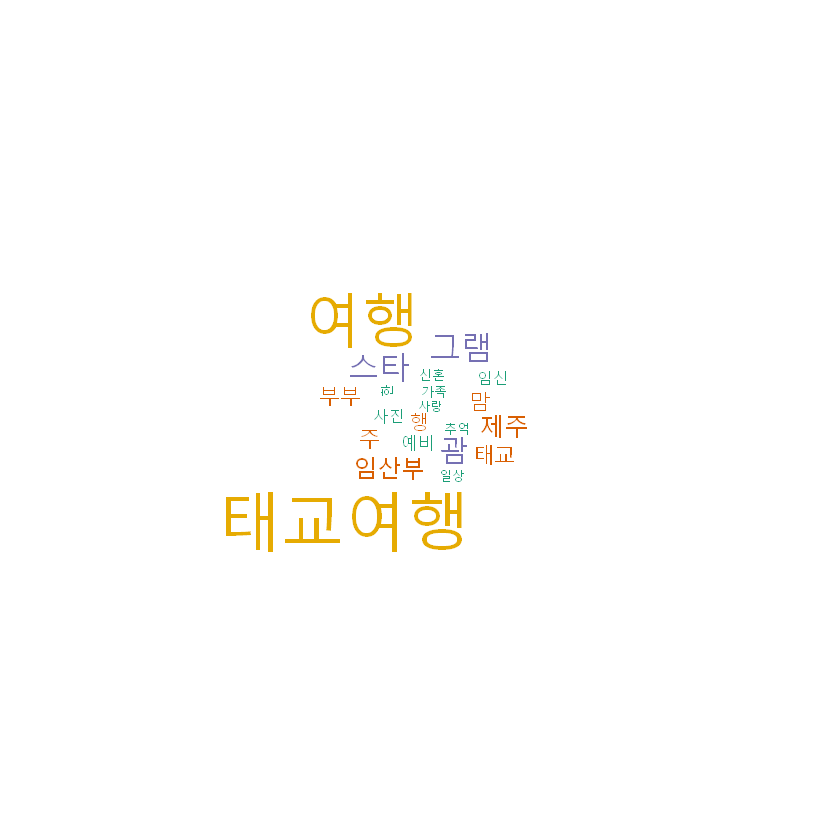

In [12]:
#---------------------------------------------------------------------------
# Q2) 전처리된 데이터에서 “태교여행”이란 단어를 사전에 추가하고 명사를 추출해 
#     출현빈도 10위까지 막대그래프로 시각화하시오. 
#---------------------------------------------------------------------------

buildDictionary(ext_dic = "woorimalsam", user_dic=data.frame(c("태교여행"),"ncn"),replace_usr_dic = T)

tour1<-sapply(tour_1,extractNoun)

table.cnoun<-head(sort(table(unlist(tour1)),decreasing=T),10)

barplot(table.cnoun, main="tour 데이터 빈출 명사", 
        xlab="단어",
        ylab="빈도")

# 3) 전처리된 데이터를 이용해 워드클라우드를 작성하고 인사이트를 추출하시오.

result<-data.frame(sort(table(unlist(tour1)),decreasing=T))

t<-wordcloud(result$Var1,result$Freq,color=brewer.pal(6,"Dark2"),min.freq=20)

